In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [78]:
df = pd.read_csv('../data/processed/cleaned-products.csv', encoding='ISO-8859-1')

print(df)

                SKU                                        Description  \
0      4DM73487622R  Smith - 4D MAG Goggle - Connor Ryan Storm Blue...   
1            541745                Stans - Tubless Tire Sealant - 16oz   
2            541745                Stans - Tubless Tire Sealant - 16oz   
3      ADU23584956L   Screamer - Neckwarmer - Charcoal/Sunlight - OSFA   
4      ANI11300719M             Black Crows - Anima 115 Skis - 189.2cm   
...             ...                                                ...   
39774        440534                    Incredibell Adjustabell 2 black   
39775       5258695     Fx 3 Disc M Alpine Blue To Deep Dark Blue Fade   
39776       5269176    Kickstand Bontrager integrated alloy rear mount   
39777        564879       Saddle Bontrager boulevard fluid 225mm black   
39778  CAG38650395K       Cage Trek Elite Ocean Recycled Plastic Black   

                                            Category  \
0              Clothing - Winter - Eyewear - Goggles   

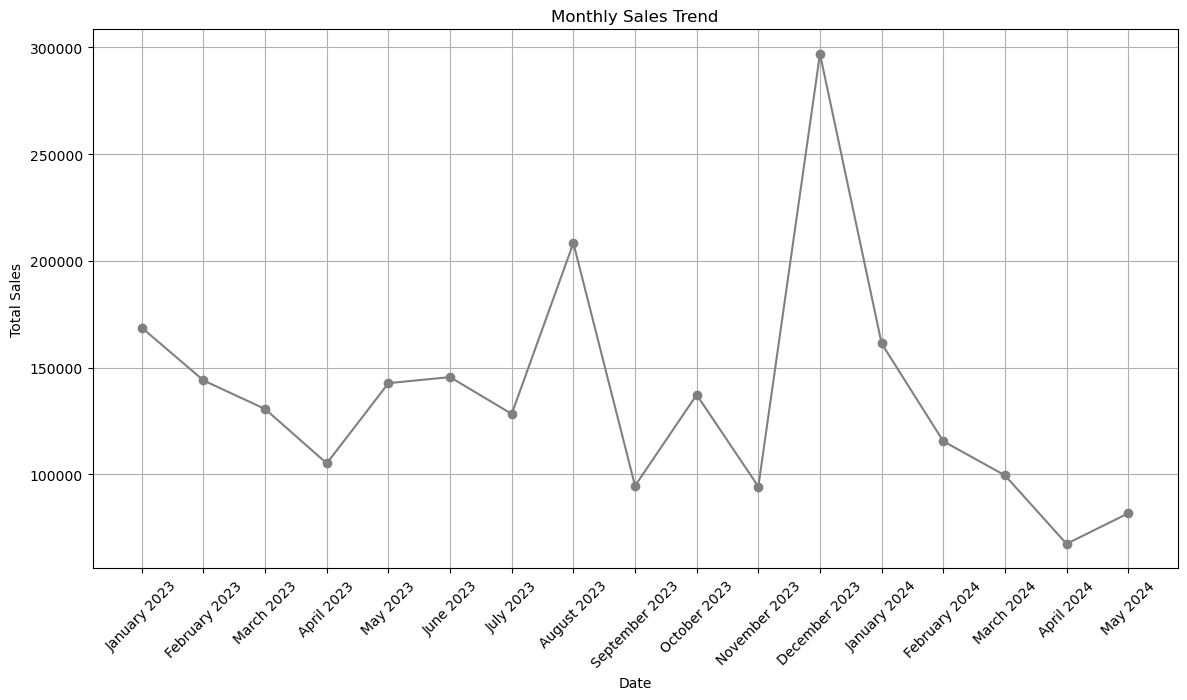

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Convert SaleDate to datetime
df['SaleDate'] = pd.to_datetime(df['SaleDate'])

# Aggregate sales by month
monthly_sales = df.groupby(df['SaleDate'].dt.to_period('M')).agg({'Total': 'sum'}).reset_index()
monthly_sales['SaleDate'] = monthly_sales['SaleDate'].dt.to_timestamp()

# Format the SaleDate to show the month written out
monthly_sales['SaleDate'] = monthly_sales['SaleDate'].dt.strftime('%B %Y')

# Plot sales trends
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales['SaleDate'], monthly_sales['Total'], marker='o', linestyle='-', color='grey')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()


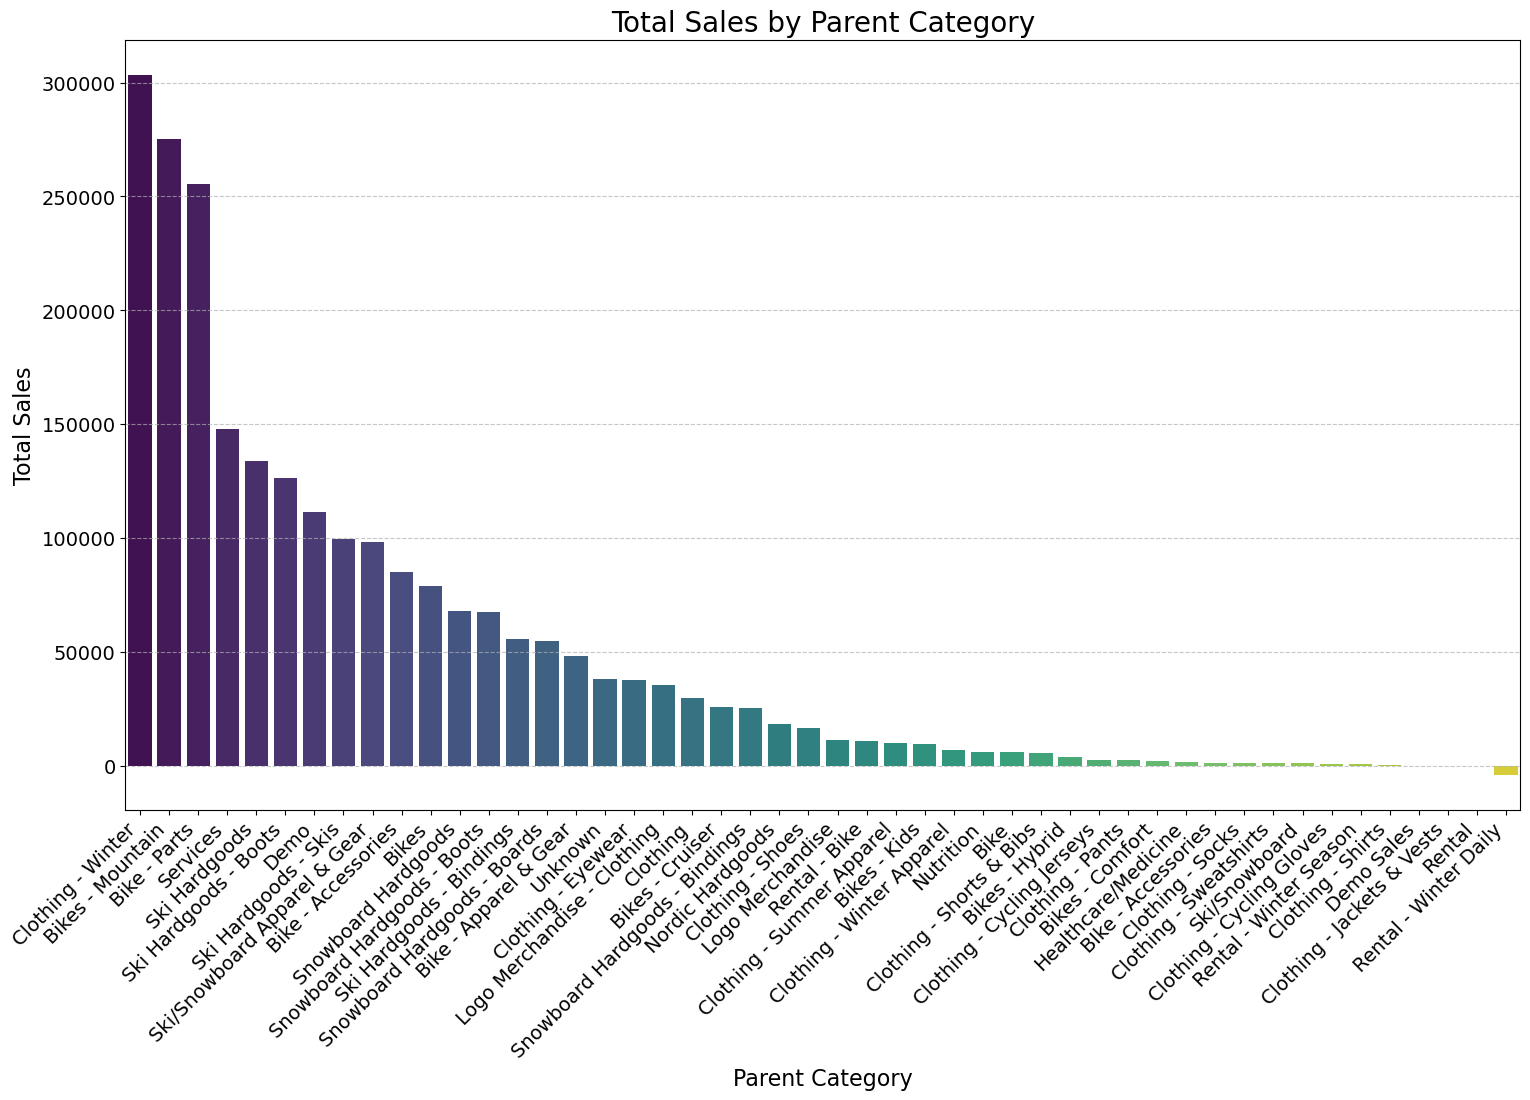

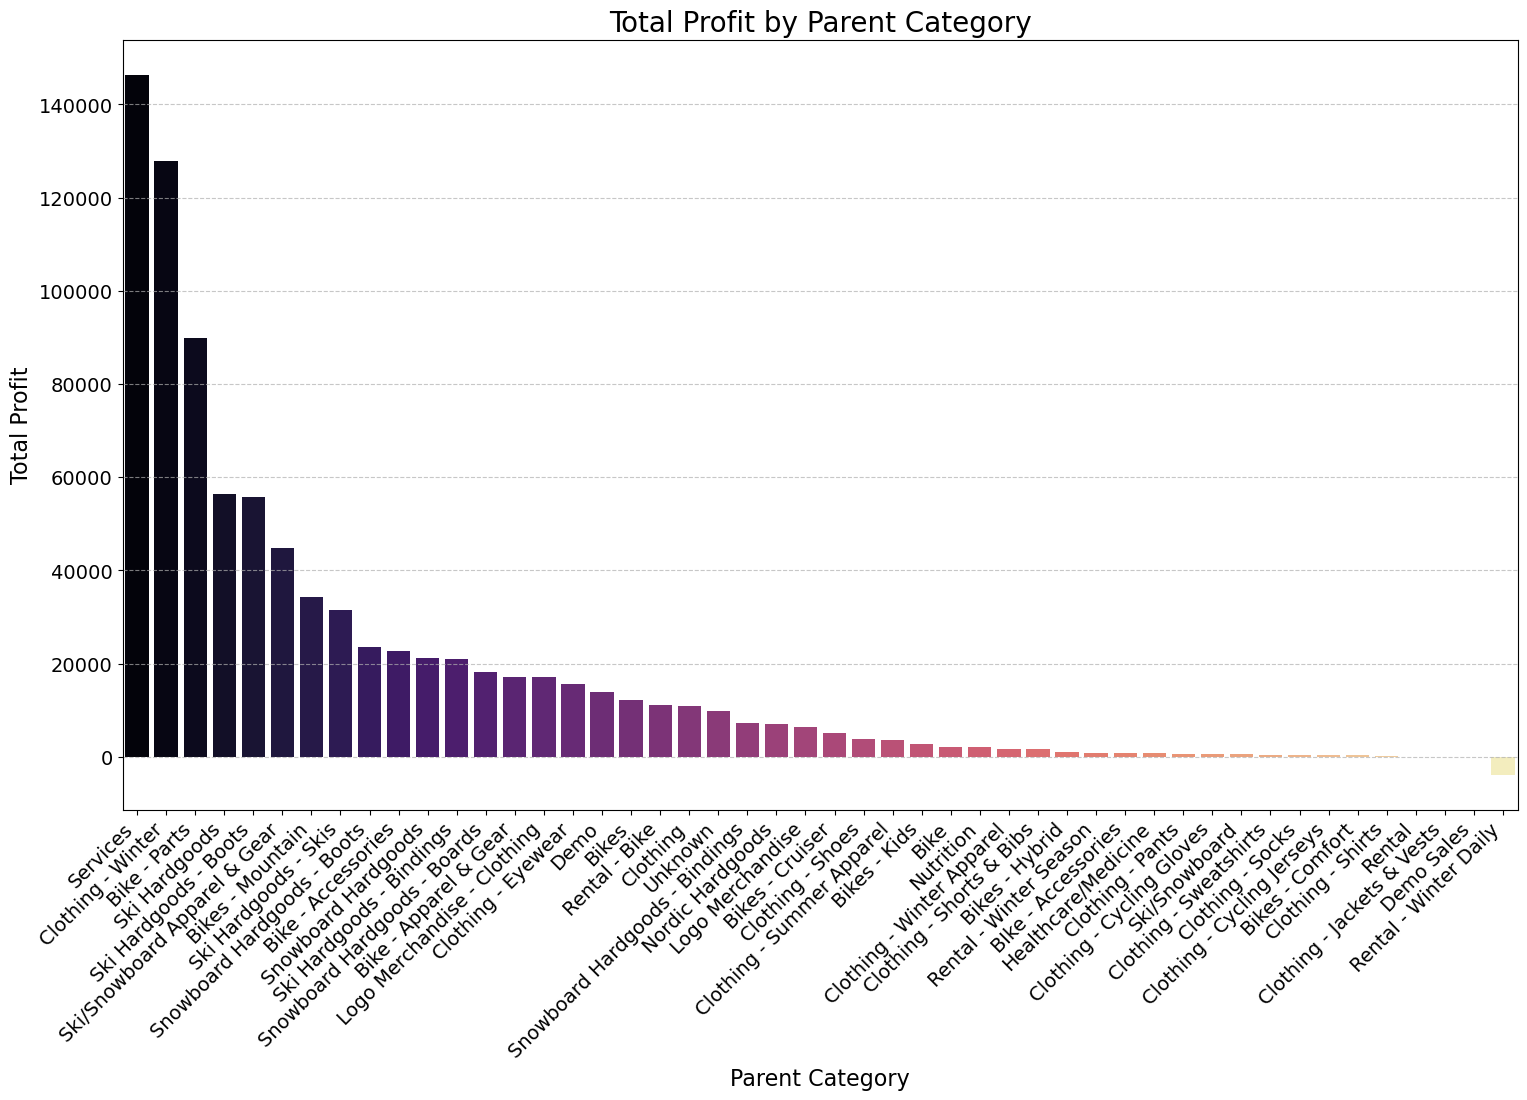

In [80]:
# Function to extract ParentCategory with NaN handling
def extract_parent_category(category):
    if pd.isna(category):
        return "Unknown"
    parts = category.split(" - ")
    if len(parts) >= 3:
        return " - ".join(parts[:2])
    else:
        return parts[0]

# Apply function to create ParentCategory
df['ParentCategory'] = df['Category'].apply(extract_parent_category)

# Aggregate sales by ParentCategory
parent_category_sales = df.groupby('ParentCategory').agg({'Total': 'sum'}).reset_index()
parent_category_profit = df.groupby('ParentCategory').agg({'Profit': 'sum'}).reset_index()

# Sort by total sales and profit in descending order
parent_category_sales = parent_category_sales.sort_values(by='Total', ascending=False)
parent_category_profit = parent_category_profit.sort_values(by='Profit', ascending=False)

# Plot total sales by parent category
plt.figure(figsize=(18, 10))
sns.barplot(
    y='Total', 
    x='ParentCategory', 
    data=parent_category_sales, 
    palette='viridis'
)
plt.title('Total Sales by Parent Category (Jan 23 - May 24)', fontsize=20)
plt.ylabel('Total Sales', fontsize=16)
plt.xlabel('Parent Category', fontsize=16)
plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot profit by parent category
plt.figure(figsize=(18, 10))
sns.barplot(
    y='Profit', 
    x='ParentCategory', 
    data=parent_category_profit, 
    palette='magma'
)
plt.title('Total Profit by Parent Category (Jan 23 - May 24)', fontsize=20)
plt.ylabel('Total Profit', fontsize=16)
plt.xlabel('Parent Category', fontsize=16)
plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

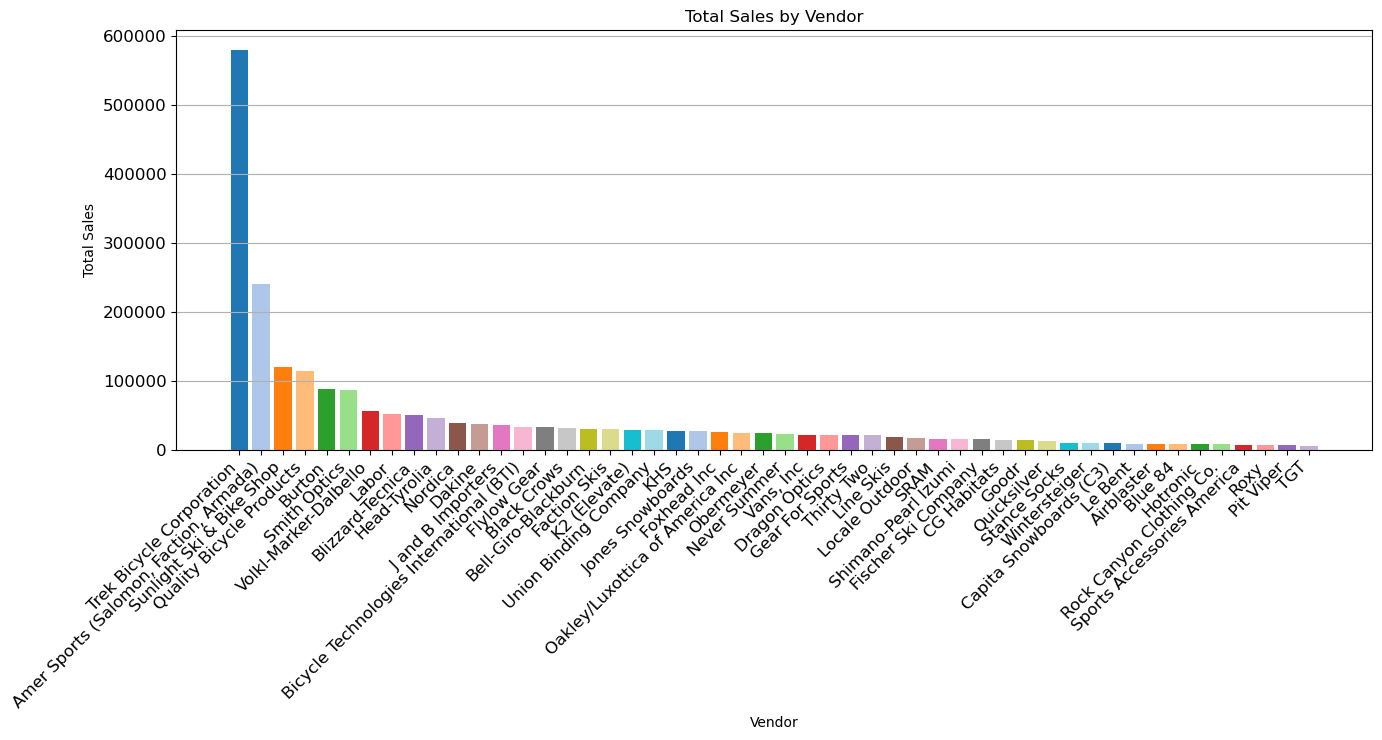

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Aggregate sales by vendor
vendor_sales = df.groupby('Vendor').agg({'Total': 'sum'}).reset_index()

# Filter vendors with total sales >= 20
vendor_sales_filtered = vendor_sales[vendor_sales['Total'] >= 20]

# Sort the values by total sales in descending order and select top 50 vendors
vendor_sales_sorted = vendor_sales_filtered.sort_values(by='Total', ascending=False).head(50)

# Plot vendor sales
plt.figure(figsize=(14, 7))
bars = plt.bar(vendor_sales_sorted['Vendor'], vendor_sales_sorted['Total'], width=0.8, color=plt.cm.tab20.colors)

plt.title('Total $ Sales by Vendor (Jan 23 - May 24)')
plt.ylabel('Total Sales ($)')
plt.xlabel('Vendor')
plt.grid(True, axis='y')

# Improve the readability of the labels
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.subplots_adjust(bottom=0.35)  # Add more spacing at the bottom for x-axis labels

plt.show()


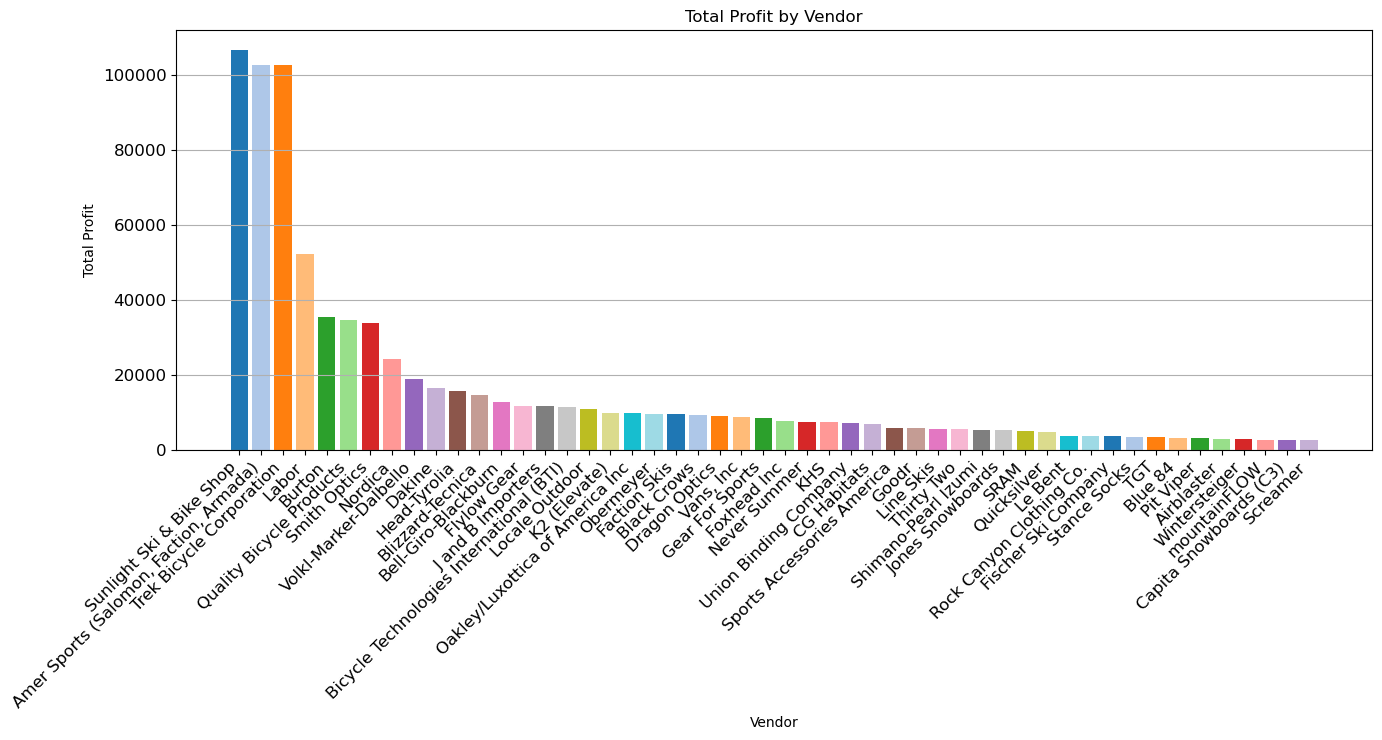

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns 'Vendor', 'Sales', and 'Cost'
# Calculate profit
df['Profit'] = df['Sales'] - df['Cost']

# Aggregate profit by vendor
vendor_profit = df.groupby('Vendor').agg({'Profit': 'sum'}).reset_index()

# Filter vendors with total profit >= 20
vendor_profit_filtered = vendor_profit[vendor_profit['Profit'] >= 20]

# Sort the values by total profit in descending order and select top 50 vendors
vendor_profit_sorted = vendor_profit_filtered.sort_values(by='Profit', ascending=False).head(50)

# Plot vendor profit
plt.figure(figsize=(14, 7))
bars = plt.bar(vendor_profit_sorted['Vendor'], vendor_profit_sorted['Profit'], width=0.8, color=plt.cm.tab20.colors)

plt.title('Total Profit by Vendor (Jan 23 - May 24)')
plt.ylabel('Total Profit')
plt.xlabel('Vendor')
plt.grid(True, axis='y')

# Improve the readability of the labels
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.subplots_adjust(bottom=0.35)  # Add more spacing at the bottom for x-axis labels

plt.show()


In [56]:
# Aggregate sales by vendor
vendor_sales = df.groupby('Vendor').agg({'Total': 'sum'}).reset_index()

# Print out the counts for each vendor
print("Counts for each vendor:")
print(vendor_sales)



Counts for each vendor:
                    Vendor    Total
0                     Abus    24.90
1        Adidas - Five Ten  3498.26
2               Airblaster  8149.55
3                  Aloe up   716.53
4                   Amazon  1847.29
..                     ...      ...
115   Wheels Manufacturing   316.29
116          Wintersteiger  9202.98
117         Yes Snowboards    89.86
118  Yesterdays Sportswear  5538.66
119           mountainFLOW  4386.72

[120 rows x 2 columns]


Major Outliers:
                SKU                                        Description  \
20     DEM231837243                   DEMO Skis - Volkl Kendo 88 - 163   
32     INF13224537M      Never Summer - Infinity Snowboard - W's 151cm   
45      MEN1578974M       Never Summer - Harpoon Snowboard - M's 159cm   
59     PRO12900919M          Never Summer - Proto FR Snowboard - 160cm   
66     REN34506646I                  RENTAL STANDARD ADULT SKI - DAILY   
...             ...                                                ...   
39565  SUP52246031K  Supplement Kate's Real Food Bivybar Lemcoconut...   
39646  CRU32771498E  Demo - Electra - Cruiser GO! Step Through - Bl...   
39660  MAR33160693E                            Marlin+ 8 Us L 29 Pr-Bk   
39732  CRU32771498E  Demo - Electra - Cruiser GO! Step Through - Bl...   
39775       5258695     Fx 3 Disc M Alpine Blue To Deep Dark Blue Fade   

                                   Category                    Vendor  \
20                    

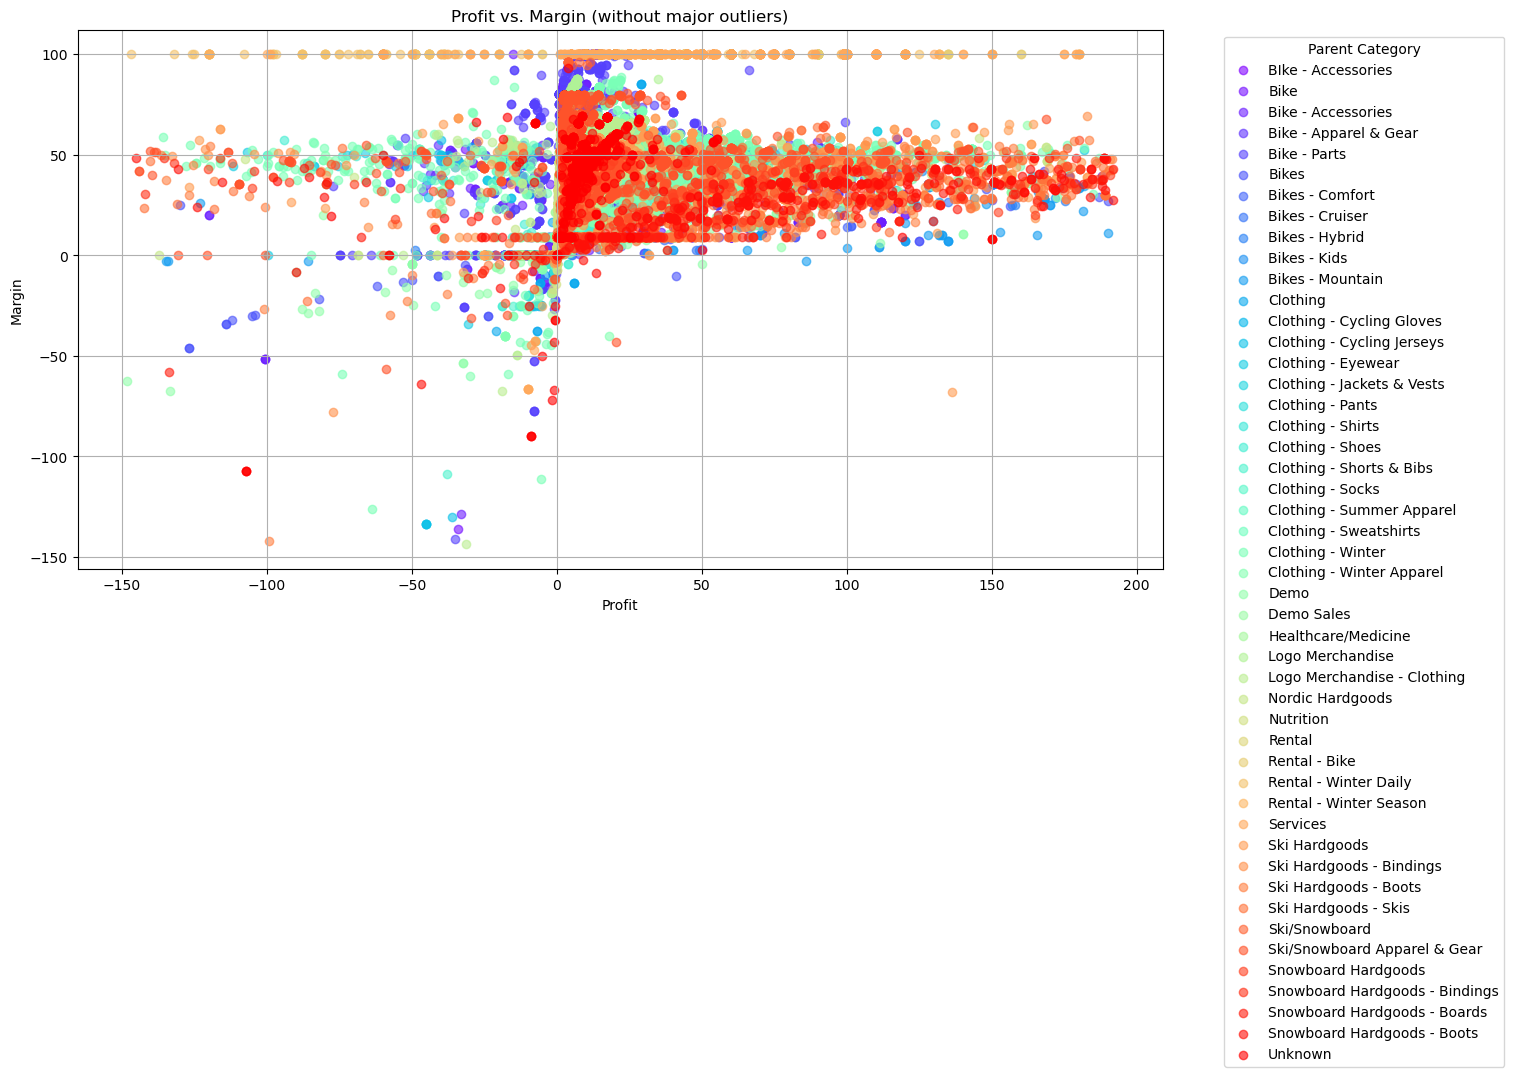

In [61]:
def find_outliers(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    outliers = data[(data - mean).abs() > threshold * std]
    return outliers

# Identify outliers in Profit and Margin
profit_outliers = find_outliers(df['Profit'])
margin_outliers = find_outliers(df['Margin'])

# Merge the outliers
outliers = df[df['Profit'].isin(profit_outliers) | df['Margin'].isin(margin_outliers)]

# Print out the major outliers
print("Major Outliers:")
print(outliers)

# Remove the outliers from the DataFrame
df_cleaned = df[~df.index.isin(outliers.index)]

# Sort Parent Category alphabetically
categories = sorted(df_cleaned['ParentCategory'].unique())

# Create a color map using a rainbow colormap
colors = plt.cm.rainbow(np.linspace(0, 1, len(categories)))

# Plot profit vs. margin without outliers and color by Parent Category
plt.figure(figsize=(14, 7))

for i, category in enumerate(categories):
    category_data = df_cleaned[df_cleaned['ParentCategory'] == category]
    plt.scatter(category_data['Profit'], category_data['Margin'], alpha=0.6, label=category, color=colors[i])

plt.title('Profit vs. Margin (without major outliers)')
plt.xlabel('Profit')
plt.ylabel('Margin')
plt.grid(True)

# Render the legend separately
plt.legend(title='Parent Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Major Outliers:
                SKU                                        Description  \
20     DEM231837243                   DEMO Skis - Volkl Kendo 88 - 163   
32     INF13224537M      Never Summer - Infinity Snowboard - W's 151cm   
45      MEN1578974M       Never Summer - Harpoon Snowboard - M's 159cm   
59     PRO12900919M          Never Summer - Proto FR Snowboard - 160cm   
66     REN34506646I                  RENTAL STANDARD ADULT SKI - DAILY   
...             ...                                                ...   
39565  SUP52246031K  Supplement Kate's Real Food Bivybar Lemcoconut...   
39646  CRU32771498E  Demo - Electra - Cruiser GO! Step Through - Bl...   
39660  MAR33160693E                            Marlin+ 8 Us L 29 Pr-Bk   
39732  CRU32771498E  Demo - Electra - Cruiser GO! Step Through - Bl...   
39775       5258695     Fx 3 Disc M Alpine Blue To Deep Dark Blue Fade   

                                   Category                    Vendor  \
20                    

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


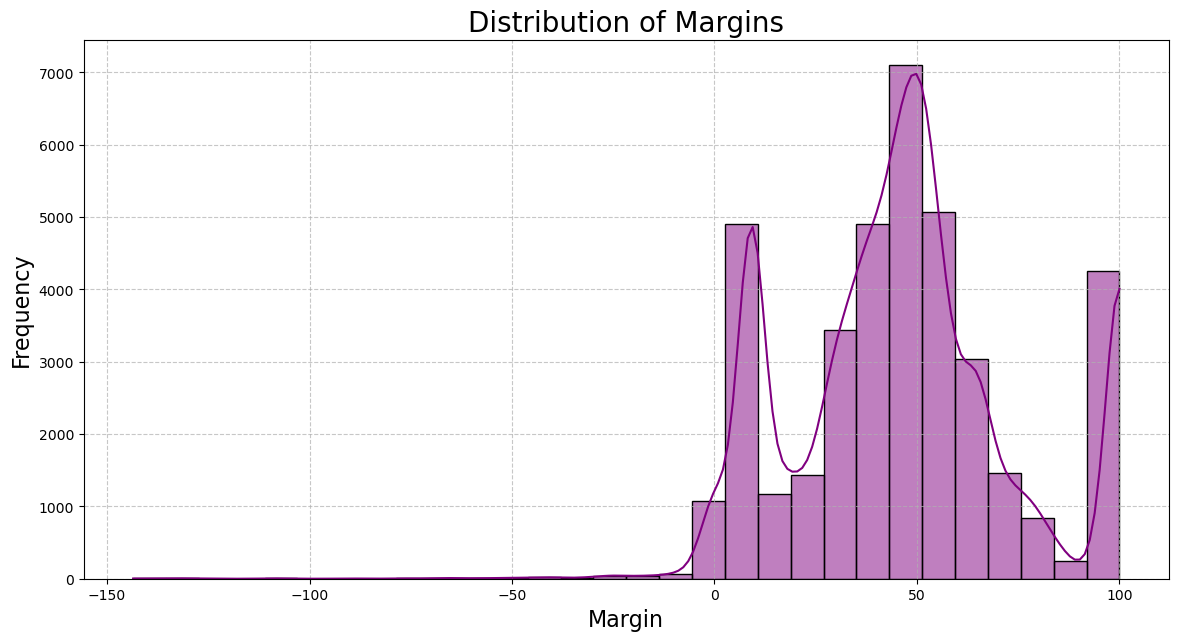

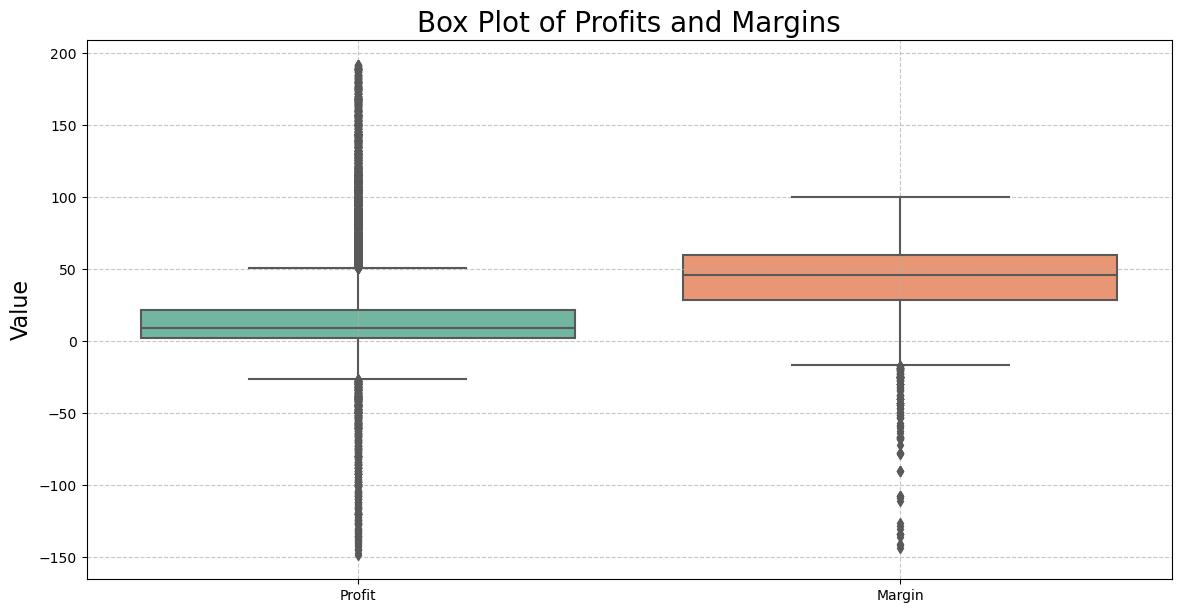

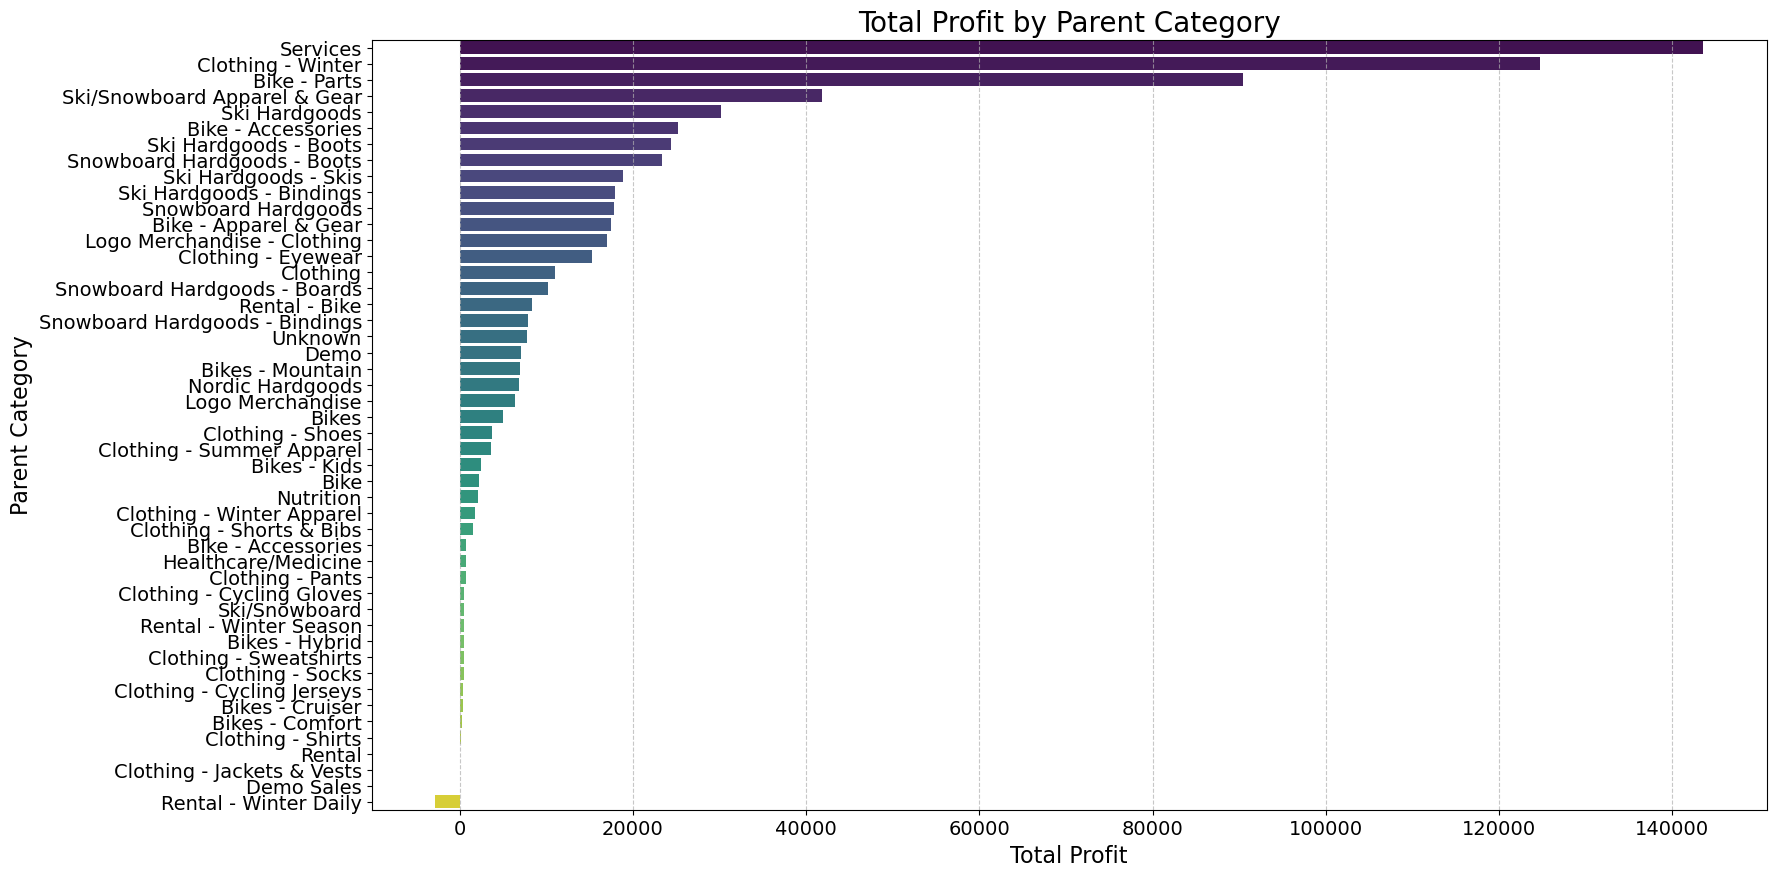

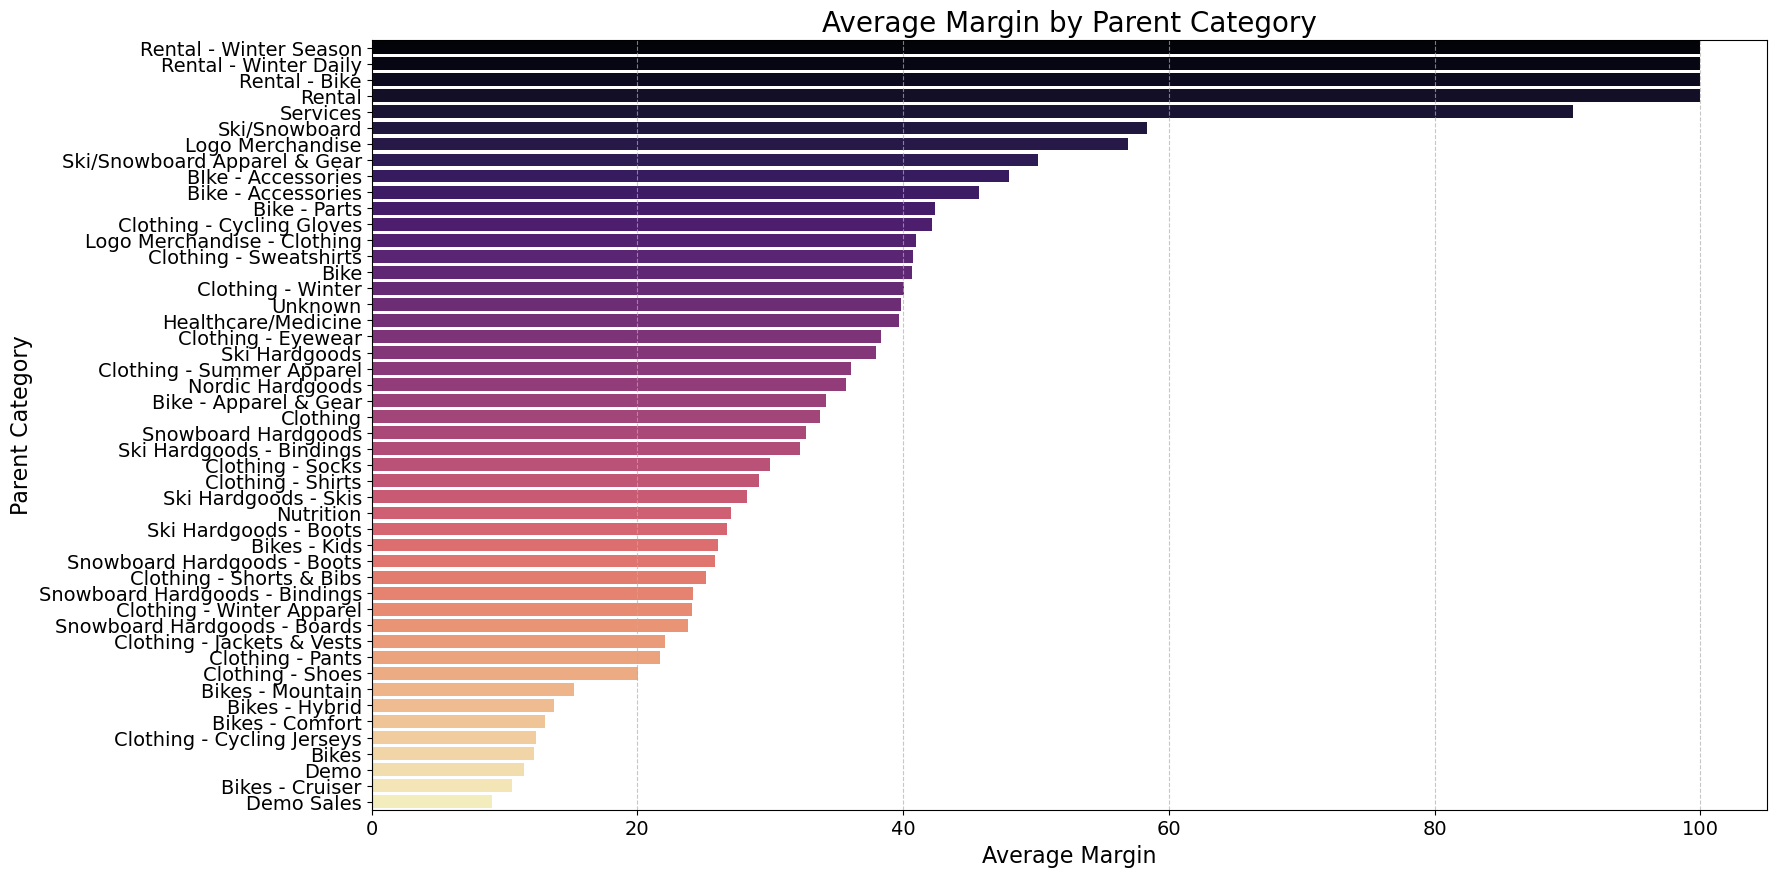

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming df is your DataFrame
# Function to extract ParentCategory with NaN handling
def extract_parent_category(category):
    if pd.isna(category):
        return "Unknown"
    parts = category.split(" - ")
    if len(parts) >= 3:
        return " - ".join(parts[:2])
    else:
        return parts[0]

# Apply function to create ParentCategory
df['ParentCategory'] = df['Category'].apply(extract_parent_category)

# Define a function to detect outliers
def find_outliers(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    outliers = data[(data - mean).abs() > threshold * std]
    return outliers

# Identify outliers in Profit and Margin
profit_outliers = find_outliers(df['Profit'])
margin_outliers = find_outliers(df['Margin'])

# Merge the outliers
outliers = df[df['Profit'].isin(profit_outliers) | df['Margin'].isin(margin_outliers)]

# Print out the major outliers
print("Major Outliers:")
print(outliers)

# Remove the outliers from the DataFrame
df_cleaned = df[~df.index.isin(outliers.index)]

# Summary statistics
profit_summary = df_cleaned['Profit'].describe()
margin_summary = df_cleaned['Margin'].describe()

print("Profit Summary Statistics:")
print(profit_summary)
print("\nMargin Summary Statistics:")
print(margin_summary)

# Histogram of Margins
plt.figure(figsize=(14, 7))
sns.histplot(df_cleaned['Margin'], bins=30, kde=True, color='purple')
plt.title('Distribution of Margins', fontsize=20)
plt.xlabel('Margin', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Box Plot of Profits and Margins
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_cleaned[['Profit', 'Margin']], palette='Set2')
plt.title('Box Plot of Profits and Margins', fontsize=20)
plt.ylabel('Value', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Aggregate profit by ParentCategory
parent_category_profit = df_cleaned.groupby('ParentCategory').agg({'Profit': 'sum'}).reset_index()
parent_category_margin = df_cleaned.groupby('ParentCategory').agg({'Margin': 'mean'}).reset_index()

# Sort by total profit and average margin in descending order
parent_category_profit = parent_category_profit.sort_values(by='Profit', ascending=False)
parent_category_margin = parent_category_margin.sort_values(by='Margin', ascending=False)

# Plot profit by parent category
plt.figure(figsize=(18, 10))
sns.barplot(
    y='ParentCategory', 
    x='Profit', 
    data=parent_category_profit, 
    palette='viridis'
)
plt.title('Total Profit by Parent Category', fontsize=20)
plt.xlabel('Total Profit', fontsize=16)
plt.ylabel('Parent Category', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

# Plot margin by parent category
plt.figure(figsize=(18, 10))
sns.barplot(
    y='ParentCategory', 
    x='Margin', 
    data=parent_category_margin, 
    palette='magma'
)
plt.title('Average Margin by Parent Category', fontsize=20)
plt.xlabel('Average Margin', fontsize=16)
plt.ylabel('Parent Category', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()


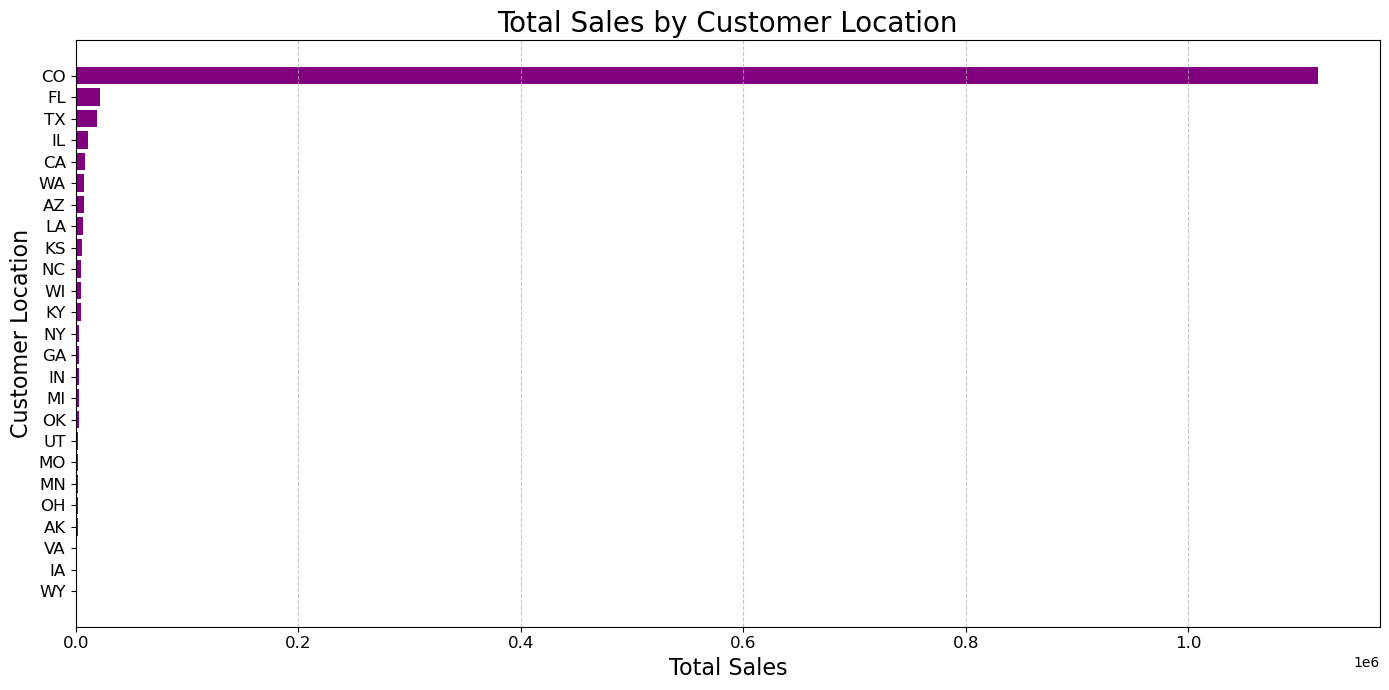

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Replace "CO" with "COLORADO" in CustomerLocation
df['CustomerLocation'] = df['CustomerLocation'].replace("COLORADO", "CO")

# Aggregate sales by customer location
location_sales = df.groupby('CustomerLocation').agg({'Total': 'sum'}).reset_index()

# Sort by total sales in descending order and select top 25 locations
location_sales_sorted = location_sales.sort_values(by='Total', ascending=False).head(25)

# Plot location sales
plt.figure(figsize=(14, 7))
plt.barh(location_sales_sorted['CustomerLocation'], location_sales_sorted['Total'], color='purple')
plt.title('Total Sales by Customer Location', fontsize=20)
plt.xlabel('Total Sales', fontsize=16)
plt.ylabel('Customer Location', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7, axis='x')
plt.gca().invert_yaxis()  # To display the highest value at the top
plt.tight_layout()

# Show the plot
plt.show()


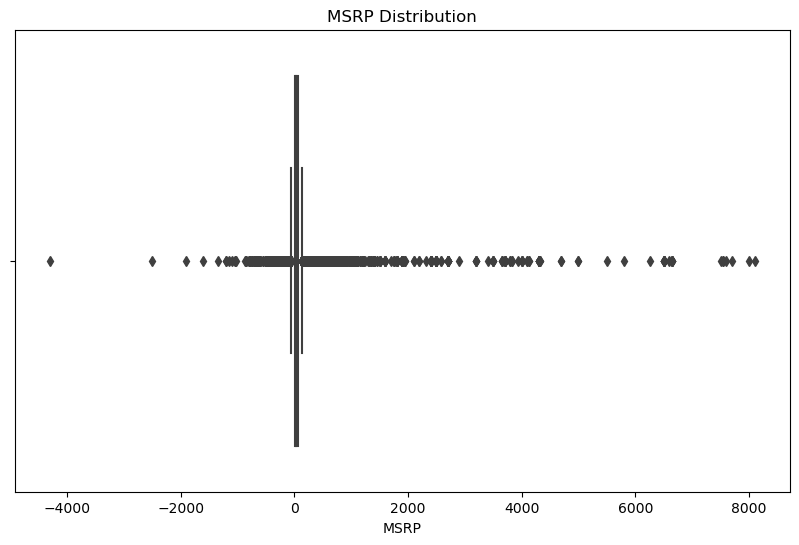

In [69]:
# Plot MSRP Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='MSRP')
plt.title('MSRP Distribution')
plt.xlabel('MSRP')
plt.savefig('../reports/figures/msrp_distribution.png')
plt.show()

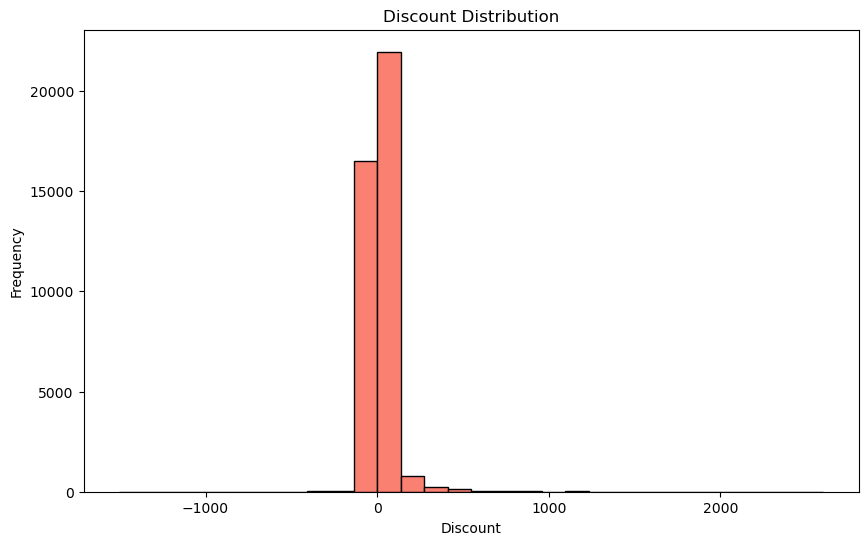

In [67]:
# Discount Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Discount'], bins=30, edgecolor='k', color='salmon')
plt.title('Discount Distribution')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.savefig('../reports/figures/discount_distribution.png')
plt.show()

Discount Outliers:
                SKU                                        Description  \
4      ANI11300719M             Black Crows - Anima 115 Skis - 189.2cm   
188    PRO20732874M  Never Summer - Proto Synthesis X Snowboard - 1...   
291      DEM3110123        DEMO Skis - Faction Agent 2X Skis - W's 163   
321    SHI33269969A  Salomon - Shift Pro 90 W AT Ski Boots - Black/...   
396    FAC218821463                  Faction - Dancer 3 Skis - M's 183   
...             ...                                                ...   
39583       1042791                   Verve 2 Disc Low Step M Rage Red   
39660  MAR33160693E                            Marlin+ 8 Us L 29 Pr-Bk   
39679       1042791                   Verve 2 Disc Low Step M Rage Red   
39680       1042791                   Verve 2 Disc Low Step M Rage Red   
39732  CRU32771498E  Demo - Electra - Cruiser GO! Step Through - Bl...   

                                 Category  \
4              Ski Hardgoods - Skis - Men   
18

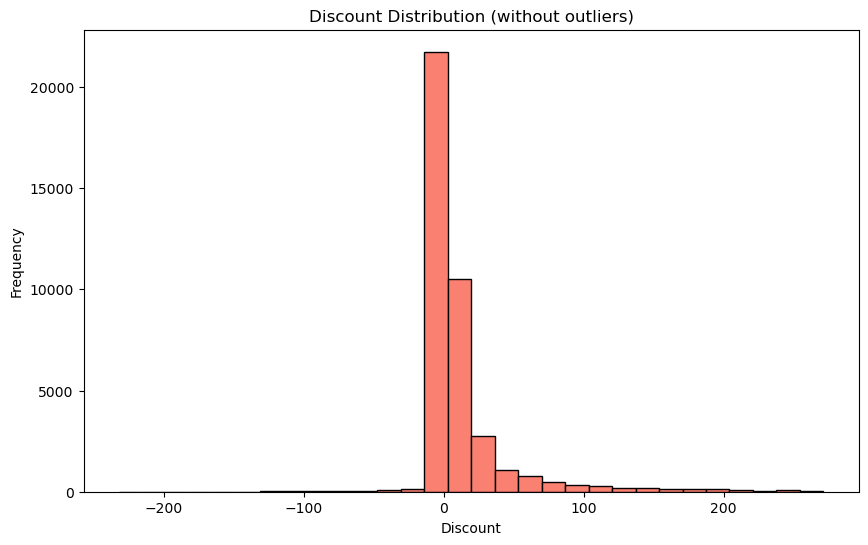

In [73]:
# Define a function to detect outliers
def find_outliers(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    outliers = data[(data - mean).abs() > threshold * std]
    return outliers

# Identify outliers in the Discount column
discount_outliers = find_outliers(df['Discount'])

# Print out the major outliers
print("Discount Outliers:")
print(df[df['Discount'].isin(discount_outliers)])

# Remove the outliers from the DataFrame
df_cleaned = df[~df.index.isin(discount_outliers.index)]

# Plot the Discount distribution without outliers
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['Discount'], bins=30, edgecolor='k', color='salmon')
plt.title('Discount Distribution (without outliers)')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.savefig('../references/discount_distribution_cleaned.png')
plt.show()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


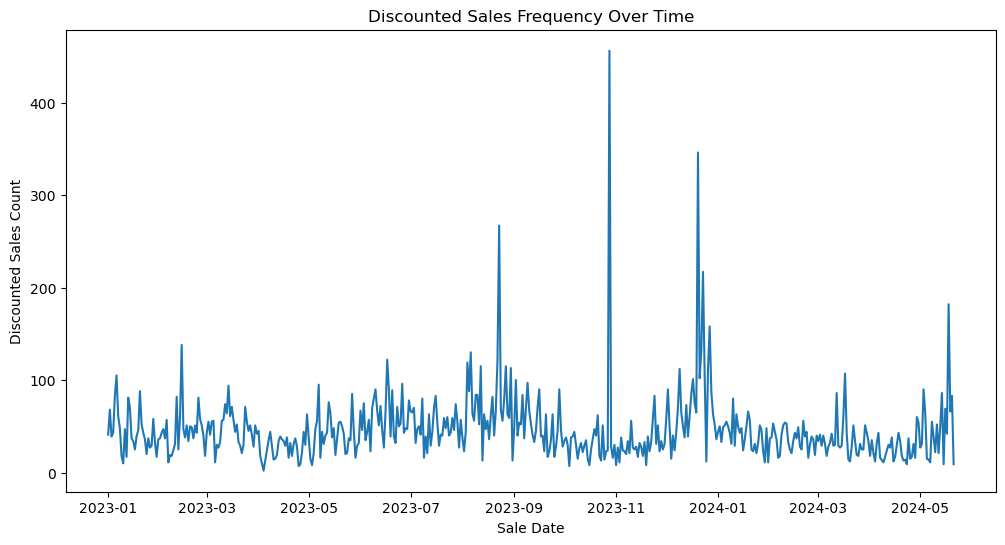

In [72]:
# Convert SaleDate to datetime
df['SaleDate'] = pd.to_datetime(df['SaleDate'])

# Group data by date and calculate discounted sales count
discounted_sales = df[df['Discount'] > 0].groupby('SaleDate')['Discount'].count().reset_index()

# Plot Sales Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='SaleDate', y='Discount', data=discounted_sales)
plt.title('Discounted Sales Frequency Over Time')
plt.xlabel('Sale Date')
plt.ylabel('Discounted Sales Count')
plt.savefig('../reports/figures/sales_over_time.png')
plt.show()


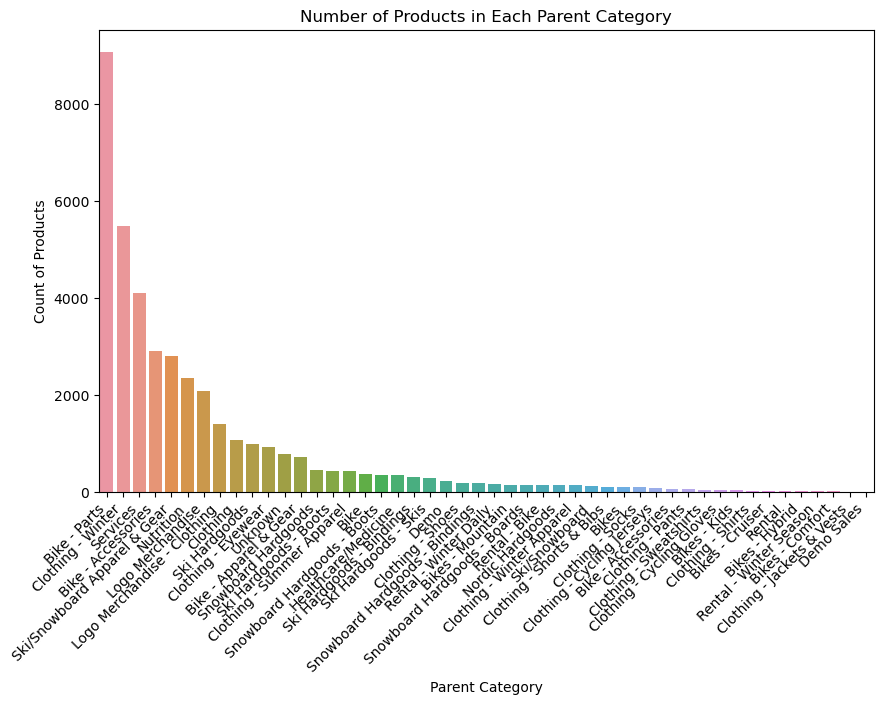

In [76]:
# Drop rows with missing values


# Plot count of products in each parent category
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ParentCategory', order=df['ParentCategory'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Parent Category')
plt.ylabel('Count of Products')
plt.title('Number of Products in Each Parent Category')
plt.show()